In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/data.csv")   # adjust file name if different
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [2]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

(95662, 16)

In [3]:
df.isnull().sum()


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [4]:
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [5]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['trans_hour'] = df['TransactionStartTime'].dt.hour
df['trans_day'] = df['TransactionStartTime'].dt.day
df['trans_month'] = df['TransactionStartTime'].dt.month
df['trans_year'] = df['TransactionStartTime'].dt.year


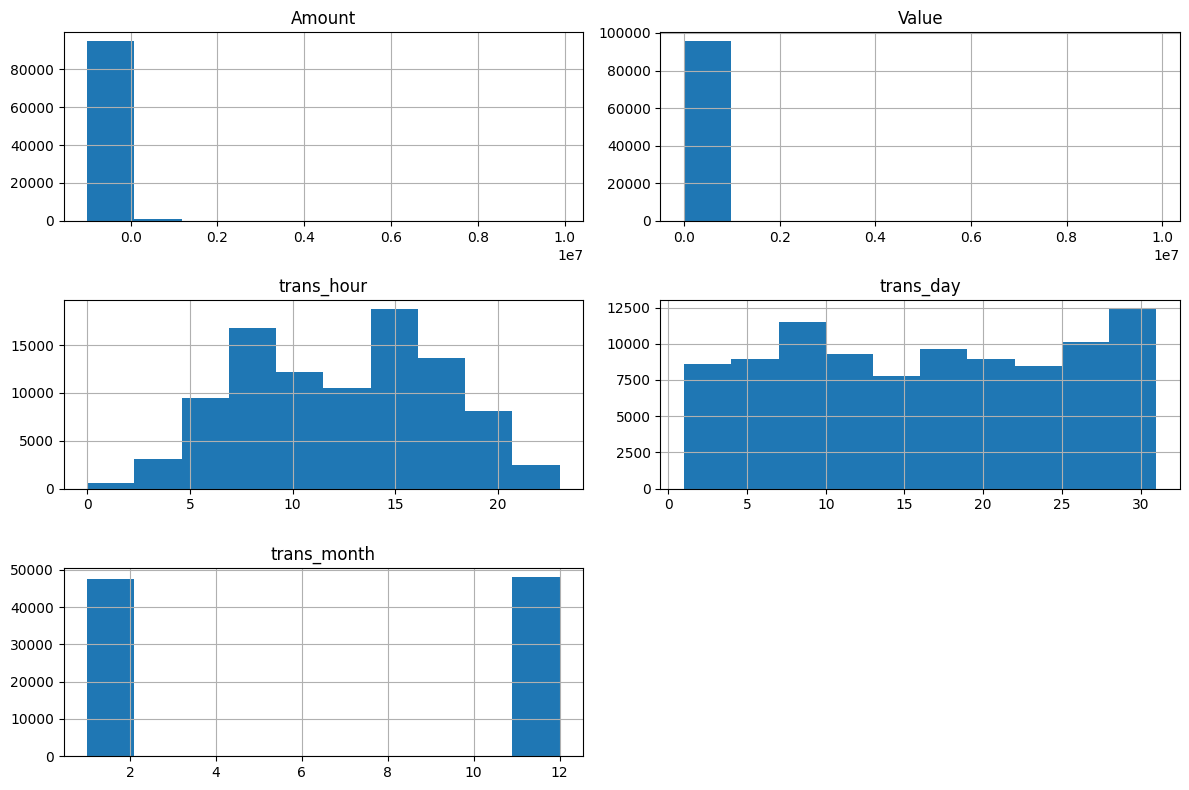

In [6]:
num_cols = ['Amount', 'Value', 'trans_hour', 'trans_day', 'trans_month']

df[num_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [7]:
cat_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'FraudResult']

for col in cat_cols:
    print(df[col].value_counts().head())
    print("-"*40)


CurrencyCode
UGX    95662
Name: count, dtype: int64
----------------------------------------
CountryCode
256    95662
Name: count, dtype: int64
----------------------------------------
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
Name: count, dtype: int64
----------------------------------------
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64
----------------------------------------
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64
----------------------------------------
FraudResult
0    95469
1      193
Name: count, dtype: int64
----------------------------------------


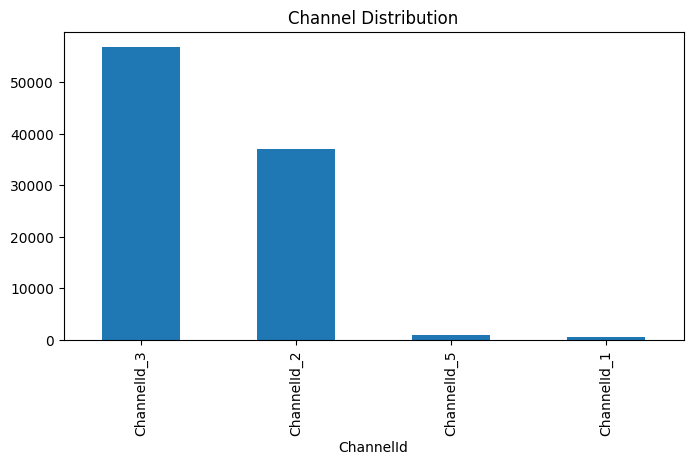

In [8]:
df['ChannelId'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Channel Distribution")
plt.show()


In [9]:
corr = df[['Amount', 'Value', 'trans_hour', 'trans_day', 'trans_month']].corr()
corr


,Amount,Value,trans_hour,trans_day,trans_month
Amount,1.000000,0.989692,-0.001611,-0.003905,-0.009060
Value,0.989692,1.000000,0.000474,-0.024104,-0.010452
trans_hour,-0.001611,0.000474,1.000000,-0.019464,0.012241
trans_day,-0.003905,-0.024104,-0.019464,1.000000,0.207837
trans_month,-0.009060,-0.010452,0.012241,0.207837,1.000000


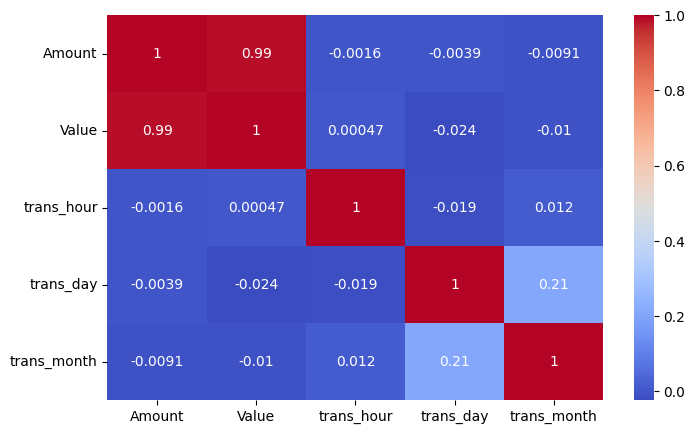

In [10]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


In [11]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


Series([], dtype: int64)

In [12]:
(missing / len(df)) * 100


TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
trans_hour              0.0
trans_day               0.0
trans_month             0.0
trans_year              0.0
dtype: float64

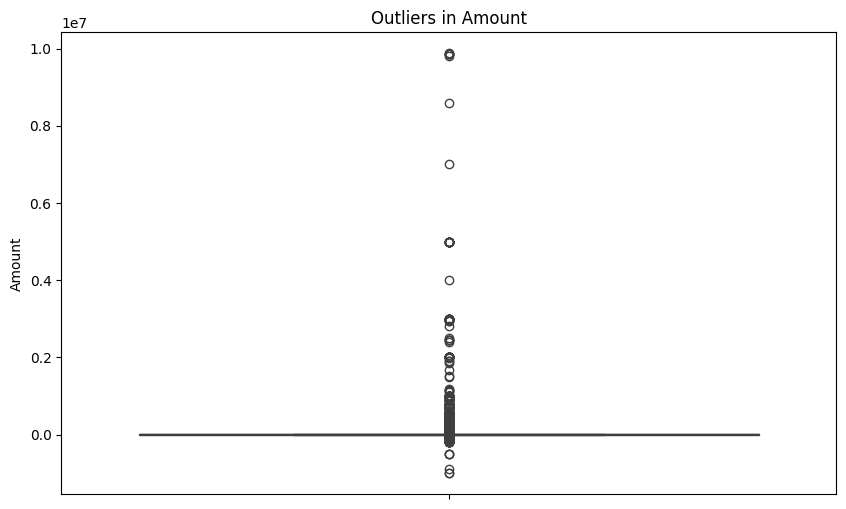

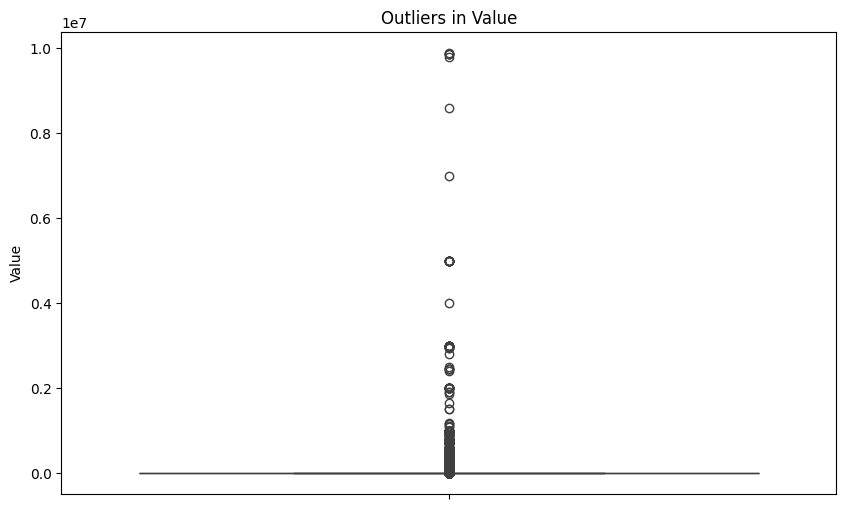

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Amount'])
plt.title("Outliers in Amount")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(df['Value'])
plt.title("Outliers in Value")
plt.show()
